In [1]:
# 套件載入
#基本資料處理套件
import numpy as np
import pandas as pd
import math
#視覺化套件
import seaborn as sns
import matplotlib.pyplot as plt
#演算法套件
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
#關閉warning
import warnings
warnings.filterwarnings('ignore')

### 載入資料集

In [2]:
#載入資料集
train = pd.read_csv('./dataset/ghouls-goblins-and-ghosts-boo/train.csv')
test = pd.read_csv('./dataset/ghouls-goblins-and-ghosts-boo/test.csv')

### 查看前 10 筆資料，並查看資料的狀態與資訊，例如多少欄位、各欄位的型態、各欄位空值狀況等等。

In [3]:
train.head(10)

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost
5,7,0.405680,0.253277,0.441420,0.280324,green,Goblin
6,8,0.399331,0.568952,0.618391,0.467901,white,Goblin
7,11,0.516224,0.536429,0.612776,0.468048,clear,Ghoul
8,12,0.314295,0.671280,0.417267,0.227548,blue,Ghost
9,19,0.280942,0.701457,0.179633,0.141183,white,Ghost


In [4]:
test.head(10)

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black
5,14,0.292890,0.505851,0.297927,0.106263,white
6,15,0.584456,0.551680,0.628330,0.499118,white
7,16,0.485525,0.459242,0.657735,0.565337,blue
8,17,0.471757,0.407916,0.465992,0.406608,blue
9,18,0.572953,0.316454,0.668388,0.640692,clear


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
id               529 non-null int64
bone_length      529 non-null float64
rotting_flesh    529 non-null float64
hair_length      529 non-null float64
has_soul         529 non-null float64
color            529 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 24.9+ KB


### 查看 train 資料中數值型各欄位的統計數值，例如:最大、最小、平 均等等。

In [7]:
train.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


In [8]:
test.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,529.000000,529.000000,529.000000,529.000000,529.000000
mean,453.584121,0.425474,0.503637,0.517288,0.464096
std,257.804948,0.136079,0.158552,0.171727,0.179659
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,239.000000,0.329383,0.393987,0.388189,0.338964
50%,445.000000,0.421989,0.510065,0.520220,0.461294
75%,670.000000,0.519024,0.605957,0.644824,0.584448
max,899.000000,1.000000,1.000000,0.999841,1.000000


### 查看類別型特徵欄位
### 資料中的特徵欄位只有 color 是類別型欄位，圖表中檢視了不同種怪物的類別與顏色記數狀況。

#### 怪物數量為 white 顏色最多，clear 顏色為其次，其他顏色則是較少，且各數量都差不多。 顏色對於怪物的種類都沒有明顯的變化(每個顏色的怪物種類數量都差不多)，感覺上顏色這個特徵欄位得不太到太多的資訊， 這裡原本有考慮直接刪除顏色欄位不進行下一步的建模，但後來覺得資料的欄位筆數太少的關係就沒有做更動，僅簡單的檢視。

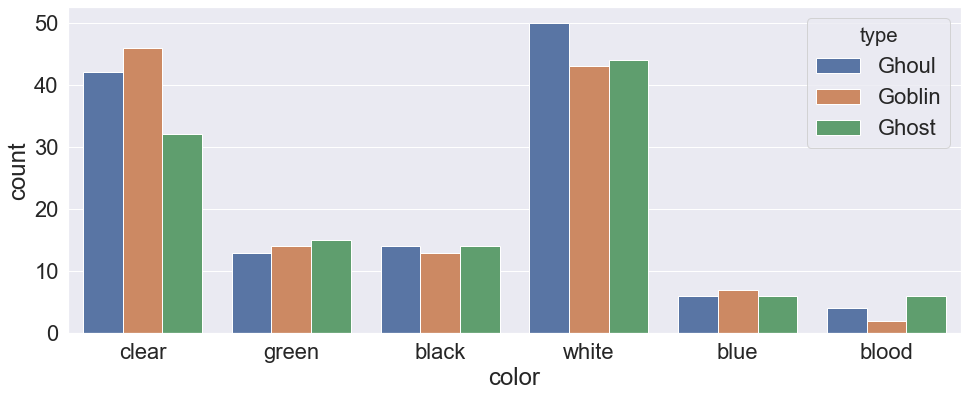

In [9]:
sns.set(font_scale=2)
plt.figure(figsize=(16, 6))
sns.countplot(x="color",hue='type', data=train)

### 查看數值型特徵欄位 

#### 資料欄位中，bone_length、rotting_flesh、hair_length、has_soul 這四個為數值型特徵欄位，圖表中比較了這四個數值型特徵欄位與 type 欄位的關係。這裡可以看出除了 rotting_flesh 欄位，其他欄位有滿相似的分布狀態。

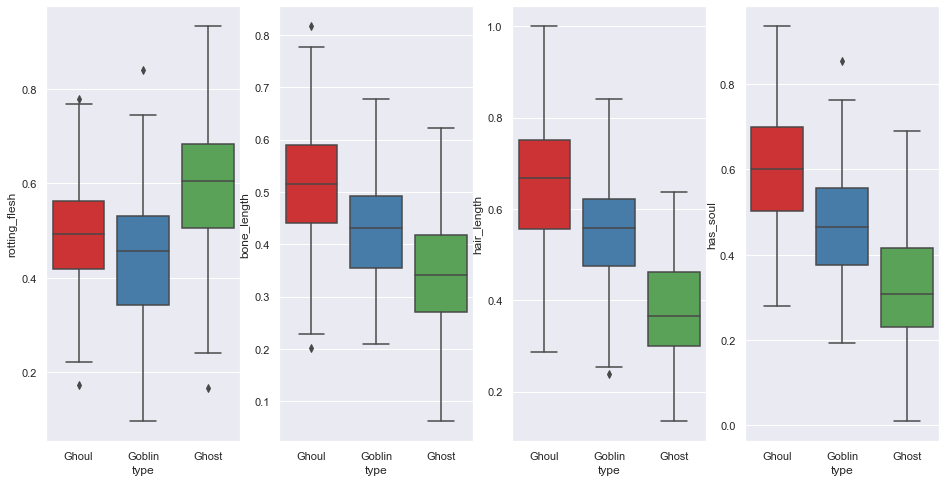

In [10]:
sns.set(font_scale=1)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,8))
col_names = ['rotting_flesh','bone_length','hair_length','has_soul']
for i in range(len(col_names)):
    sns.boxplot(x="type", y=col_names[i], data=train, palette="Set1",ax=axes[i])

#### 為了想進一步的檢視兩兩欄位之間的交互作用狀況，目的在於希望能從中得到新的並且有用的資訊，這裡以 A 欄位與 B 欄位相乘得出新的欄位(例如: hair_length 與 has_soul 欄位相乘得出 hair_soul 欄位)，並以視覺化圖表來呈現兩兩欄位交互作用之狀況。

In [11]:
hair_soul = train['hair_length'] * train['has_soul']
bone_flesh = train['bone_length'] * train['rotting_flesh']
bone_hair = train['bone_length'] * train['hair_length']
bone_soul = train['bone_length'] * train['has_soul']
flesh_hair = train['rotting_flesh'] * train['hair_length']
flesh_soul = train['rotting_flesh'] * train['has_soul']

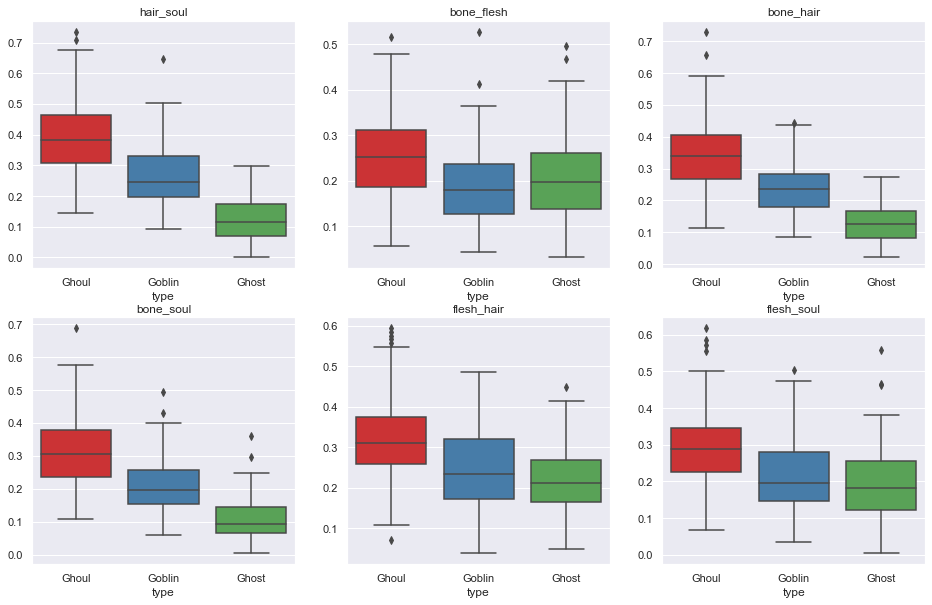

In [12]:
sns.set(font_scale=1)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10))
new_col = [hair_soul,bone_flesh,bone_hair,bone_soul,flesh_hair,flesh_soul]
plot_title = ['hair_soul','bone_flesh','bone_hair','bone_soul','flesh_hair','flesh_soul']
for i in range(6):
    plot = sns.boxplot(x = train['type'], y = new_col[i], palette="Set1",ax=axes[math.floor(i/3),i%3])
    plot.title.set_text(plot_title[i])

#### hair_soul、bone_hair、bone_soul，感覺上比較能依照數 值的大小來區分怪物的類別，因此取這三個欄位作為新的欄位， 來增加模型訓練的欄位。

In [13]:
# train新欄位
train['hair_soul'] = hair_soul
train['bone_hair'] = bone_hair
train['bone_soul'] = bone_soul
# test新欄位
test['hair_soul'] = test['hair_length'] * test['has_soul']
test['bone_hair'] = test['bone_length'] * test['hair_length']
test['bone_soul'] = test['bone_length'] * test['has_soul']

### 區分訓練資料、測試資料

In [14]:
#train test資料的id
index_train = train['id']
index_test = test['id']

#y_train中type欄位為模型的答案
train['type'] = train['type'].map({'Ghost': 1, 'Goblin': 2, 'Ghoul': 3})
train_type = train['type']

#將train資料中不要進行訓練的欄位刪除
train = train.drop(['id','type'],axis=1)
test = test.drop(['id'],axis=1)

#處理資料中非數值欄位 -> get_dummies
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [15]:
#區分訓練資料、測試資料
X_train,X_test,y_train,y_test = train_test_split(train[train.columns].values,train_type,
                                                test_size = 0.3,
                                                random_state = 1,
                                                stratify = train_type)

### 演算法選擇
#### 這裡總共選了五種演算法進行模型訓練，分別是: Logistic Regression(羅吉斯迴歸)、SVM (支持向量機)、RandomForest (隨機 森林)、XGBoost(Extreme Gradient Boosting)、 AdaBoost(Adaptive Boosting)，訓練完以上五種模型，最後用投票分 類器(VotingClassifier)進行整體的模型訓練。

In [16]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

lr_train = accuracy_score(y_train, y_train_pred)
lr_test = accuracy_score(y_test, y_test_pred)
print('LogisticRegression train/test accuracies %.3f/%.3f' 
      % (lr_train, lr_test))

LogisticRegression train/test accuracies 0.753/0.714


In [17]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#std Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_std,y_train)

y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

std_lr_train = accuracy_score(y_train, y_train_pred)
std_lr_test = accuracy_score(y_test, y_test_pred)
print('std+LogisticRegression train/test accuracies %.3f/%.3f' 
      % (std_lr_train, std_lr_test))

std+LogisticRegression train/test accuracies 0.780/0.741


In [18]:
#SVM
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train,y_train)

y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

svc_train = accuracy_score(y_train, y_train_pred)
svc_test = accuracy_score(y_test, y_test_pred)

print('SVM train/test accuracies %.3f/%.3f' 
      % (svc_train, svc_test))

SVM train/test accuracies 0.745/0.741


### GridSearchCV
#### 接下來使用的演算法包括:RandomForestClassifier、 AdaBoostClassifier、XGBClassifier，他們所擁有參數會較多，優點 在於這些演算法功能性會較強，缺點是可能會需要較多的時間找到 最好的參數。這裡使用了 scikit-Learn 提供 GridSearchCV 函數，只 要把參數輸入進去，就能給出最優化的結果和參數，這也算是暴力 搜尋的方法。

In [19]:
# RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy',max_features = None)
param_dict = {'n_estimators' : [5,10,15,20],
              'max_depth' : [3,5,10],
              'min_samples_split' : [2, 5, 7]
                 }

grid = GridSearchCV(rf, param_grid=param_dict, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)

best_estimator = grid.best_estimator_ #回傳最好的參數組合
print(format(grid.best_params_))

best_estimator.fit(X_train,y_train)

y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)

rf_train = accuracy_score(y_train, y_train_pred)
rf_test = accuracy_score(y_test, y_test_pred)

print('RandomForestClassifier train/test accuracies %.3f/%.3f' 
      % (rf_train, rf_test))

{'max_depth': 3, 'min_samples_split': 7, 'n_estimators': 15}
RandomForestClassifier train/test accuracies 0.819/0.750


In [20]:
ada = AdaBoostClassifier(random_state=0)
param_dict = {'n_estimators' : [5,10,15,20],
              'learning_rate' : [0.01,0.05,0.1]
                }
grid = GridSearchCV(ada, param_grid=param_dict, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)

best_estimator = grid.best_estimator_ #回傳最好的參數組合
print(format(grid.best_params_))

best_estimator.fit(X_train,y_train)

y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)

print('AdaBoostClassifier train/test accuracies %.3f/%.3f' 
      % (ada_train, ada_test))

{'learning_rate': 0.05, 'n_estimators': 15}
AdaBoostClassifier train/test accuracies 0.695/0.705


In [21]:
xgbc = XGBClassifier()
param_dict = {
        'n_estimators':[20,40,60,80],
        'max_depth':[2,3,4,5],
        'learning_rate':[0.01,0.05,0.1],
        }
grid = GridSearchCV(xgbc ,param_dict, cv = 5, scoring = 'neg_log_loss')
grid.fit(X_train,y_train) #訓練

best_estimator = grid.best_estimator_ #回傳最好的參數組合
print(format(grid.best_params_))

best_estimator.fit(X_train,y_train)

y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)

xgbc_train = accuracy_score(y_train, y_train_pred)
xgbc_test = accuracy_score(y_test, y_test_pred)

print('XGBClassifier train/test accuracies %.3f/%.3f' 
      % (xgbc_train, xgbc_test))

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}
XGBClassifier train/test accuracies 0.880/0.741


In [22]:
lr = LogisticRegression()
svc = svm.SVC()
rf = RandomForestClassifier(criterion = 'entropy',
                            max_features = None,
                            max_depth=10,
                            min_samples_split=5,
                            n_estimators=5)
xgbc = XGBClassifier(learning_rate=0.1,
                     max_depth=2,
                     n_estimators=60)
ada = AdaBoostClassifier(random_state=0,
                         learning_rate=0.05,
                         n_estimators=15)

### VotingClassifier
#### 使用 votingclassifier 來整合上述模型的訓練結果，目的在於將多個分類器預測出來的結果進行投票的方式，最後得到一個強的整合分類器。

#### 其中 votingclassifier 有 voting 的參數可以做調整:
#### voting = 'hard':表示最終決策方式爲 Hard Voting Classifier，根 據少數服從多數來決定最終結果。
#### voting = 'soft':表示最終決策方式爲 Soft Voting Classifier，將所 有模型預測樣本爲某一類別的概率的平均值作爲標準，概率最 高的對應的類型爲最終的預測結果。

In [23]:
voting_clf = VotingClassifier(estimators = [('rf', rf), ('svc',svc), ('lr',lr), ('xgbc',xgbc), ('ada', ada)],
                              voting = 'hard')
voting_clf.fit(X_train_std, y_train)
y_pred = voting_clf.predict(X_test_std)
print('VotingClassifier accuracy: %.3f' % (voting_clf.score(X_train_std, y_train)))

VotingClassifier accuracy: 0.853


#### 以 votingclassifier 在整個透過 standardscaler 轉換的訓練集資料 中訓練，將訓練好的模型對測試集資料的 type 欄位進行預測。

In [24]:
voting_clf.fit(train,train_type)
test_pred = voting_clf.predict(test)

### 匯出資料與上傳結果

In [25]:
submit = pd.DataFrame()
submit['id'] = index_test
submit['type'] = test_pred
submit['type'] = submit['type'].map({1:'Ghost',2:'Goblin' ,3:'Ghoul'})
print(submit)
submit.to_csv("sub_vote.csv",sep=',',header=True,index=None)

      id    type
0      3   Ghoul
1      6  Goblin
2      9   Ghoul
3     10  Goblin
4     13   Ghost
..   ...     ...
524  893  Goblin
525  894   Ghost
526  895   Ghoul
527  898   Ghost
528  899   Ghost

[529 rows x 2 columns]


#### 在使用 RandomForestClassifier 和 XGBClassifier 有發現他們在分別 在 train 資料及 test 資料的預測準確度相差有點多，都是 train 的分 數高出 test 的分數 0.1 左右，可以看出模型過度學習訓練資料，變 得無法順利去預測或分辨不是在訓練資料內的其他資料。

#### 模型的 overfitting 的問題，除了可能資料太少之外，也可能因為擁 有太多的參數、功能太強的模型造成的，而這裡主要以減少欄位特 徵來著手，以下以 XGBClassifier 作為嘗試:

#### 檢查 XGBClassifier 模型的各 feature 重要程度並視覺化呈現。圖中 可以看出特徵欄位的重要程度前五名為:hair_soul、bone_hair、 rotting_flesh、hair_length、bone_soul。

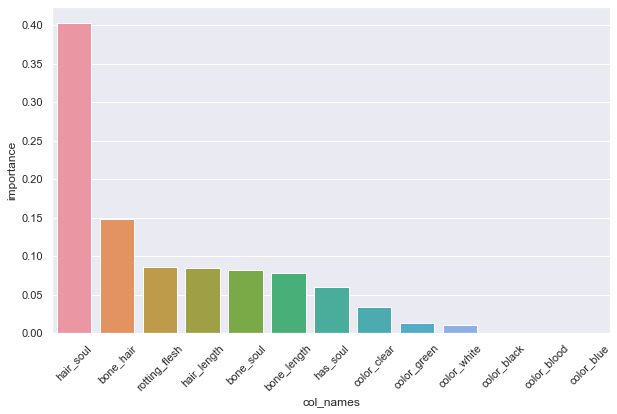

In [26]:
#xgboost feature importance
xgbc_feature_df = pd.DataFrame()
xgbc_feature_df['col_names'] = train.columns
xgbc_feature_df['importance'] = best_estimator.feature_importances_
xgbc_feature_df = xgbc_feature_df.sort_values(['importance'],ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.barplot(x='col_names',y='importance',data = xgbc_feature_df)

#### 只取這個五個欄位再進行一次 train_test_split。最後使用 XGBClassifier 建立模型，並用 GridSearchCV 函數找出該 演算法最佳參數。這裡可以看出分別在 train 資料及 test 資料的預測 準確度，分別是 0.857 和 0.741。從原本的分數為 0.880 和 0.741， train 的準確度有下降的趨勢，看起來 overfitting 的程度有下降的趨勢，但是在 test 資料集的準確度一樣是 0.741，因此沒有做後續的更動。

In [27]:
#挑選前五重要參數，解決overfitting問題
f5 = xgbc_feature_df['col_names'].head(5).values
new_train = train[f5]
new_test = test[f5]

In [28]:
#區分訓練資料、測試資料
X_train,X_test,y_train,y_test = train_test_split(new_train[new_train.columns].values,train_type,
                                                test_size = 0.3,
                                                random_state = 1,
                                                stratify = train_type)

In [29]:
xgbc = XGBClassifier()
param_dict = {
        'n_estimators':[30,40,50,60],
        'max_depth':[2,3,4,5],
        'learning_rate':[0.01,0.05,0.1],
        }
grid = GridSearchCV(xgbc ,param_dict, cv = 5, scoring = 'neg_log_loss')
grid.fit(X_train,y_train) #訓練
best_estimator = grid.best_estimator_ #回傳最好的參數組合
print(best_estimator)

best_estimator.fit(X_train,y_train)

y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)

xgbc_train = accuracy_score(y_train, y_train_pred)
xgbc_test = accuracy_score(y_test, y_test_pred)

print('XGBClassifier train/test accuracies %.3f/%.3f' 
      % (xgbc_train, xgbc_test))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
XGBClassifier train/test accuracies 0.857/0.741


### Reference:

1. Ghosts, Goblins, and Ghouls. Oh my!

  https://www.kaggle.com/amberthomas/ghosts-goblins-and-ghouls-oh-my
2. Machine Learning With Ghouls, Goblins and Ghosts 

  https://www.kaggle.com/samratp/machine-learning-with-ghouls-goblins-and-ghosts
3.  Jupyter notebook with my solution to kaggle competition "Ghouls,
 Goblins, and Ghosts... Boo!"

    https://github.com/SuperPolyakov/ghosts_ghouls_goblins/blob/master/ghosts_ghouls_and_goblins.ipynb
4. 機器學習_ML_GridSearchCV_網格搜尋

  https://martychen920.blogspot.com/2017/09/ml-gridsearchcv.html
5. [機器學習 ML NOTE]Overfitting 過度學習

    https://medium.com/%E9%9B%9E%E9%9B%9E%E8%88%87%E5%85%94%E5%85%94%E7%9A%84%E5%B7%A5%E7%A8%8B%E4%B8%96%E7%95%8C/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-ml-note-overfitting-%E9%81%8E%E5%BA%A6%E5%AD%B8%E7%BF%92-6196902481bb
6. 机器学习:集成学习(Soft Voting Classifier)
  
  https://www.cnblogs.com/volcao/p/9483026.html
7. scikit-learn 官方文件
  
  https://scikit-learn.org/stable/user_guide.html